In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_excel('C:/LetsUpgrade_AI_ML/Day21/Data/Linear Regression.xlsx',sheet_name=0)

In [10]:
data


,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0
...,...,...,...,...,...
21608,360000,1530,3,2.50,3.0
21609,400000,2310,4,2.50,2.0
21610,402101,1020,2,0.75,2.0
21611,400000,1600,3,2.50,2.0


In [11]:
data.dtypes

price            int64
sqft_living      int64
bedrooms         int64
bathrooms      float64
floors         float64
dtype: object

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   floors       21613 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


In [13]:
data.describe()

,price,sqft_living,bedrooms,bathrooms,floors
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,3.370842,2.114757,1.494309
std,3.671272e+05,918.440897,0.930062,0.770163,0.539989
min,7.500000e+04,290.000000,0.000000,0.000000,1.000000
25%,3.219500e+05,1427.000000,3.000000,1.750000,1.000000
50%,4.500000e+05,1910.000000,3.000000,2.250000,1.500000
75%,6.450000e+05,2550.000000,4.000000,2.500000,2.000000
max,7.700000e+06,13540.000000,33.000000,8.000000,3.500000


In [14]:
data.head(1)

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.0,1.0


In [15]:
x=data.iloc[:,1:2]

In [16]:
x

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680
...,...
21608,1530
21609,2310
21610,1020
21611,1600


In [17]:
y=data.iloc[:,:1]
y

,price
0,221900
1,538000
2,180000
3,604000
4,510000
...,...
21608,360000
21609,400000
21610,402101
21611,400000


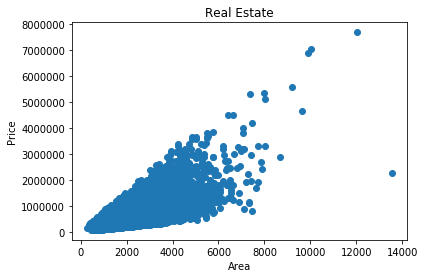

In [18]:
#Visualise the dataset

plt.scatter(x,y)
plt.title("Real Estate")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [20]:
data.shape

(21613, 5)

In [21]:
X_train.shape

(17290, 1)

In [22]:
X_test.shape

(4323, 1)

In [23]:
Y_train.shape

(17290, 1)

In [24]:
Y_test.shape

(4323, 1)

In [37]:
Y_test.head(5)

,price
6638,735000
7366,1150000
3158,350500
9117,860000
3392,122000


# Model Building with sklearn

In [25]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()

# Train the model


In [26]:
lin_reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
lin_reg.coef_

array([[280.67382569]])

In [29]:
lin_reg.intercept_

array([-42568.70358496])

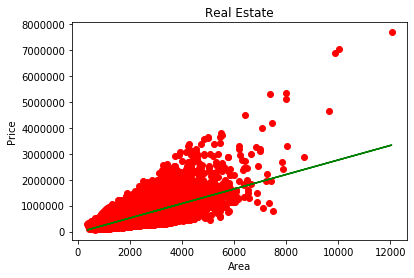

In [30]:
#Visualising Training set result

plt.scatter(X_train,Y_train, color='red')
plt.plot(X_train,lin_reg.predict(X_train), color='green')
plt.title("Real Estate")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

# Test the model

In [51]:
Y_pred=lin_reg.predict(X_test)
Y_pred


array([[633855.21632509],
       [566493.49815977],
       [364408.34366382],
       ...,
       [701216.9344904 ],
       [187583.83347987],
       [465450.9209118 ]])

In [45]:
X_test.head()

,sqft_living
6638,2410
7366,2170
3158,1450
9117,4500
3392,860


In [46]:
Y_test.head()

,price
6638,735000
7366,1150000
3158,350500
9117,860000
3392,122000


# Estimate the price

In [35]:
from sklearn.metrics import mean_squared_error,r2_score
RMSE=np.sqrt(mean_squared_error(Y_test,Y_pred))
r_square=r2_score(Y_test,Y_pred)

print ("The R-square value is...",r_square)
print ("The RMSE value is...",RMSE)

The R-square value is... 0.5031163723285275
The RMSE value is... 263380.00189817196


In [52]:
unseen_pred=lin_reg.predict(np.array([[1450]]))
print('The unseen for the given x is....',unseen_pred)

The unseen for the given x is.... [[364408.34366382]]
